# Korean demographics 2000-2022

## Data cleanup 

First, let's import the libraries and load the selected dataset.

In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/polinabattulina/Documents/Korean_demographics_2000-2022.csv")

Let's ensure that the columns contain data of the appropriate type.

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 4860 non-null   object 
 1   Region               4860 non-null   object 
 2   Birth                4716 non-null   float64
 3   Birth_rate           4709 non-null   float64
 4   Death                4716 non-null   float64
 5   Death_rate           4709 non-null   float64
 6   Divorce              4716 non-null   float64
 7   Divorce_rate         4709 non-null   float64
 8   Marriage             4716 non-null   float64
 9   Marriage_rate        4709 non-null   float64
 10  Natural_growth       4716 non-null   float64
 11  Natural_growth_rate  4709 non-null   float64
dtypes: float64(10), object(2)
memory usage: 455.8+ KB
None


number of NaN

In [36]:
total_nan = df.isna().sum().sum()
nan_per_column = df.isna().sum()
print('All NaN:', total_nan)
print('NaN in each column:', nan_per_column)


All NaN: 0
NaN in each column: Date                         0
Region                       0
Birth                        0
Birth_rate                   0
Death                        0
Death_rate                   0
Divorce                      0
Divorce_rate                 0
Marriage                     0
Marriage_rate                0
Natural_growth               0
Natural_growth_rate          0
Divorce_to_Marriage_ratio    0
Birth_to_Death_ratio         0
dtype: int64


Fill the cells with the mean value of each column.

In [21]:
df = df.fillna(df.mean(numeric_only=True))
print(df)

          Date             Region    Birth  Birth_rate    Death  Death_rate  \
0     1/1/2000              Busan   3752.0       11.61   1875.0         5.8   
1     1/1/2000  Chungcheongbuk-do   1903.0       15.06    924.0         7.3   
2     1/1/2000  Chungcheongnam-do   2398.0       14.75   1466.0         9.0   
3     1/1/2000              Daegu   3057.0       14.39   1117.0         5.3   
4     1/1/2000            Daejeon   1859.0       16.08    565.0         4.9   
...        ...                ...      ...         ...      ...         ...   
4855  6/1/2022       Jeollanam-do    565.0        3.80   1369.0         9.1   
4856  6/1/2022             Sejong    248.0        7.90    106.0         3.4   
4857  6/1/2022              Seoul   3137.0        4.10   3631.0         4.7   
4858  6/1/2022              Ulsan    443.0        4.80    434.0         4.7   
4859  6/1/2022      Whole country  18830.0        4.50  24850.0         5.9   

      Divorce  Divorce_rate  Marriage  Marriage_rat

## Data transformation

Let's add two new columns 'Birth_to_Death_ratio' (birth-to-death ratio) and 'Divorce_to_Marriage_ratio' (divorce-to-marriage_ratio) visualizate them


In [60]:
df['Birth_to_Death_ratio'] = df['Birth'] / df['Death']
print(df.columns)


Index(['Date', 'Region', 'Birth', 'Birth_rate', 'Death', 'Death_rate',
       'Divorce', 'Divorce_rate', 'Marriage', 'Marriage_rate',
       'Natural_growth', 'Natural_growth_rate', 'Divorce_to_Marriage_ratio',
       'Birth_to_Death_ratio'],
      dtype='object')


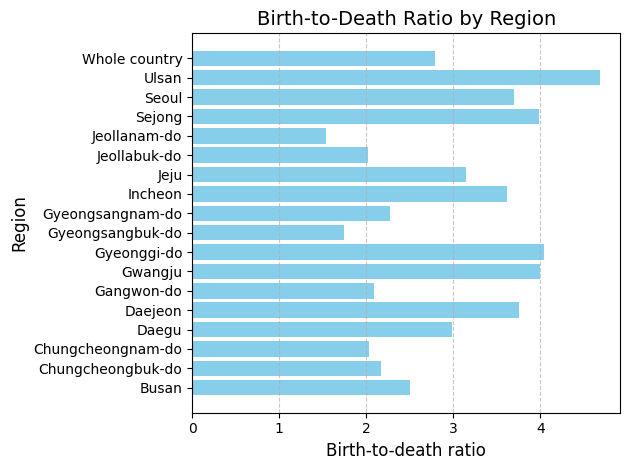

In [72]:
plt.barh(df['Region'], df['Birth_to_Death_ratio'], color='skyblue')

plt.title('Birth-to-Death Ratio by Region', fontsize=14)
plt.xlabel('Birth-to-death ratio', fontsize=12)
plt.ylabel('Region', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [74]:
df['Divorce_to_Marriage_ratio'] = df['Divorce_rate'] / df['Marriage_rate']
print(df.columns)

Index(['Date', 'Region', 'Birth', 'Birth_rate', 'Death', 'Death_rate',
       'Divorce', 'Divorce_rate', 'Marriage', 'Marriage_rate',
       'Natural_growth', 'Natural_growth_rate', 'Divorce_to_Marriage_ratio',
       'Birth_to_Death_ratio'],
      dtype='object')


<Axes: xlabel='Birth_to_Death_ratio', ylabel='Region'>

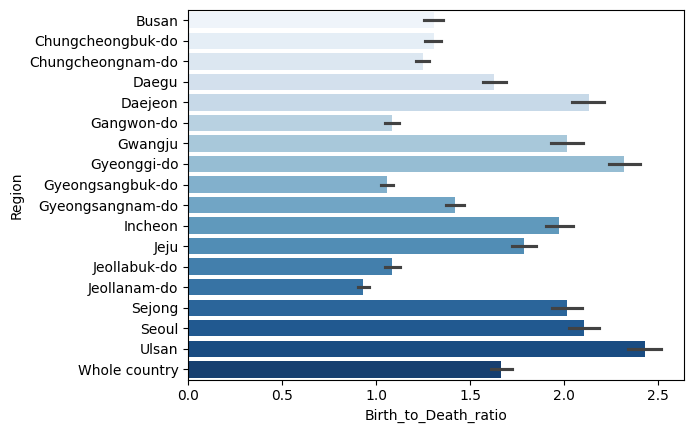

In [64]:
sns.barplot(
    data=df,
    x="Birth_to_Death_ratio",
    y="Region",
    hue="Region",  
    palette="Blues",
)


## Overview

Let's look at the main statistical indicators.

In [22]:
print(df.describe())

              Birth   Birth_rate         Death   Death_rate       Divorce  \
count   4860.000000  4860.000000   4860.000000  4860.000000   4860.000000   
mean    4138.169635     8.737872   2556.818066     5.857528   1130.374894   
std     8323.958100     2.321198   4954.151807     1.564133   2253.442083   
min       67.000000     3.100000     52.000000     3.100000     10.000000   
25%     1020.750000     7.310000    755.500000     4.500000    282.000000   
50%     1474.000000     8.760000   1173.000000     5.700000    403.000000   
75%     2472.000000    10.030000   1781.000000     7.000000    685.000000   
max    61644.000000    18.770000  44487.000000    15.700000  15517.000000   

       Divorce_rate      Marriage  Marriage_rate  Natural_growth  \
count   4860.000000   4860.000000    4860.000000     4860.000000   
mean       2.351391   2786.632952       5.608452     1581.350085   
std        0.478903   5698.207012       1.436083     4095.851323   
min        0.800000     37.000000 

Let's find the variance and standard deviation to better evaluate the distribution of indicators.

In [75]:
variance = df.var(numeric_only=True)
std_deviation = df.std(numeric_only=True)

print('Variance:',variance)
print('Standard Deviation:',std_deviation)


Variance: Birth                        6.928828e+07
Birth_rate                   5.387959e+00
Death                        2.454362e+07
Death_rate                   2.446513e+00
Divorce                      5.078001e+06
Divorce_rate                 2.293483e-01
Marriage                     3.246956e+07
Marriage_rate                2.062335e+00
Natural_growth               1.677600e+07
Natural_growth_rate          1.031640e+01
Divorce_to_Marriage_ratio    1.621260e-02
Birth_to_Death_ratio         4.908389e-01
dtype: float64
Standard Deviation: Birth                        8323.958100
Birth_rate                      2.321198
Death                        4954.151807
Death_rate                      1.564133
Divorce                      2253.442083
Divorce_rate                    0.478903
Marriage                     5698.207012
Marriage_rate                   1.436083
Natural_growth               4095.851323
Natural_growth_rate             3.211915
Divorce_to_Marriage_ratio       0.127329


Let's find the medians.

In [76]:
medians = df.median(numeric_only=True)
print('Medians:', medians)

Medians: Birth                        1474.000000
Birth_rate                      8.760000
Death                        1173.000000
Death_rate                      5.700000
Divorce                       403.000000
Divorce_rate                    2.300000
Marriage                      932.000000
Marriage_rate                   5.600000
Natural_growth                476.500000
Natural_growth_rate             2.880442
Divorce_to_Marriage_ratio       0.419258
Birth_to_Death_ratio            1.527221
dtype: float64


Finding ranges may be useful for identifying regions with the most extreme indicators

In [77]:
ranges = df.max(numeric_only=True) - df.min(numeric_only=True)
print('Ranges:', ranges)


Ranges: Birth                        61577.000000
Birth_rate                      15.670000
Death                        44435.000000
Death_rate                      12.600000
Divorce                      15507.000000
Divorce_rate                     4.200000
Marriage                     46062.000000
Marriage_rate                   10.000000
Natural_growth               59848.000000
Natural_growth_rate             24.900000
Divorce_to_Marriage_ratio        1.114141
Birth_to_Death_ratio             4.398075
dtype: float64


Let's analyze the birth rates across regions and create a visualization.

In [23]:
region_birth = df.groupby('Region')['Birth'].sum().reset_index()
region_birth


,Region,Birth
0,Busan,5.799660e+05
1,Chungcheongbuk-do,3.006470e+05
2,Chungcheongnam-do,4.040420e+05
3,Daegu,4.459530e+05
4,Daejeon,3.022020e+05
5,Gangwon-do,2.675000e+05
6,Gwangju,2.933390e+05
7,Gyeonggi-do,2.477462e+06
8,Gyeongsangbuk-do,4.956530e+05
9,Gyeongsangnam-do,6.443070e+05


               Region         Birth
0               Busan  5.799660e+05
1   Chungcheongbuk-do  3.006470e+05
2   Chungcheongnam-do  4.040420e+05
3               Daegu  4.459530e+05
4             Daejeon  3.022020e+05
5          Gangwon-do  2.675000e+05
6             Gwangju  2.933390e+05
7         Gyeonggi-do  2.477462e+06
8    Gyeongsangbuk-do  4.956530e+05
9    Gyeongsangnam-do  6.443070e+05
10            Incheon  5.443730e+05
11               Jeju  1.271860e+05
12       Jeollabuk-do  3.355860e+05
13       Jeollanam-do  3.515300e+05
14             Sejong  6.251854e+05
15              Seoul  1.917937e+06
16              Ulsan  2.408340e+05


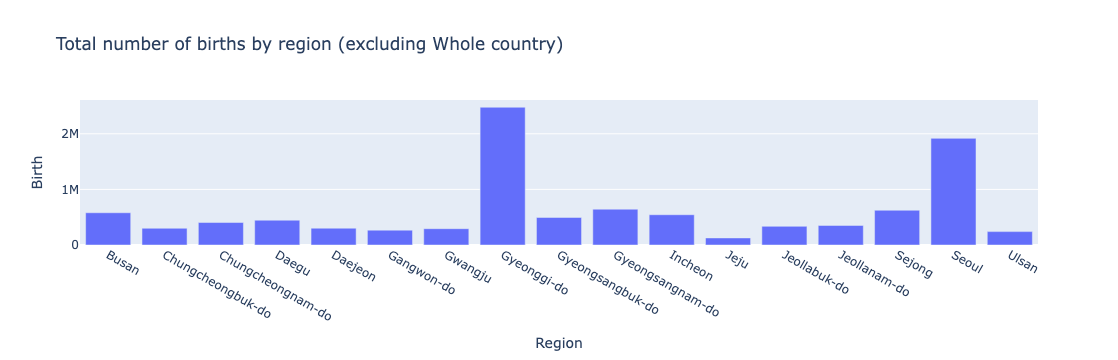

In [67]:
region_birth = df[df['Region'].str.strip().str.lower() != 'whole country'.lower()].groupby('Region')['Birth'].sum().reset_index()

print(region_birth)

#Plot of the total number of births by region (excluding "Whole country")
fig1 = px.bar(region_birth, x='Region', y='Birth', title='Total number of births by region (excluding Whole country)')
fig1.show()

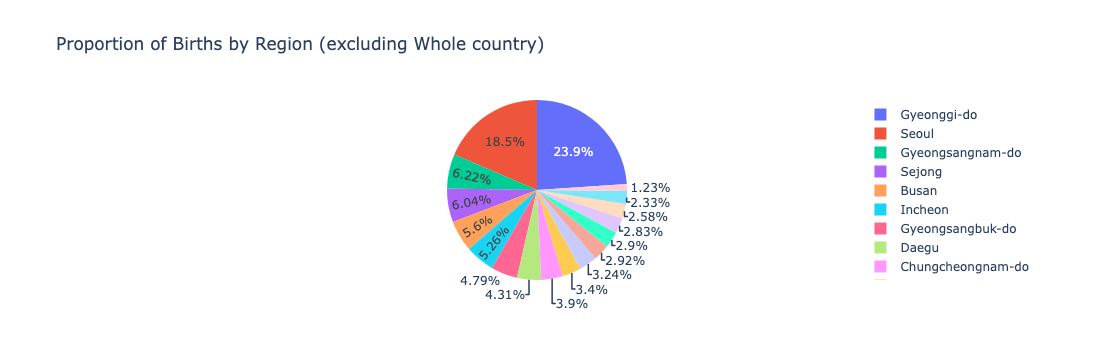

In [66]:
fig = px.pie(
    df[df['Region'] != 'Whole country'],  
    names='Region',
    values='Birth',
    title='Proportion of Births by Region (excluding Whole country)'
)

fig.show()


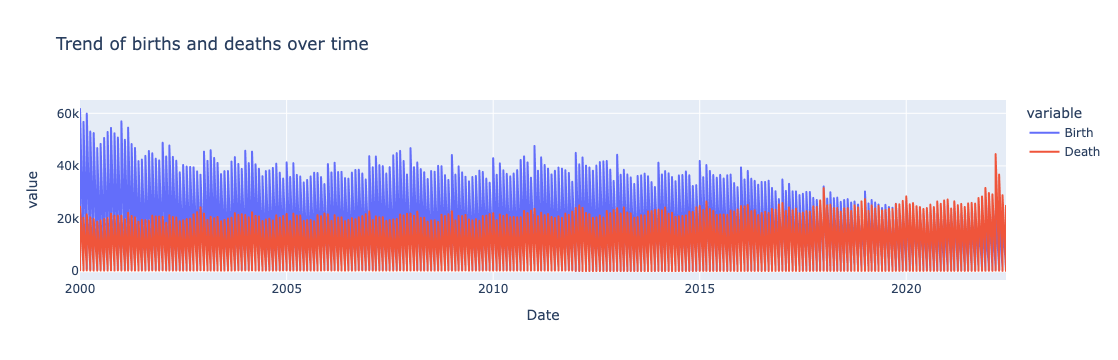

In [39]:
#Trend of births and deaths over time
px.line(df, x='Date', y=['Birth', 'Death'], title='Trend of births and deaths over time')

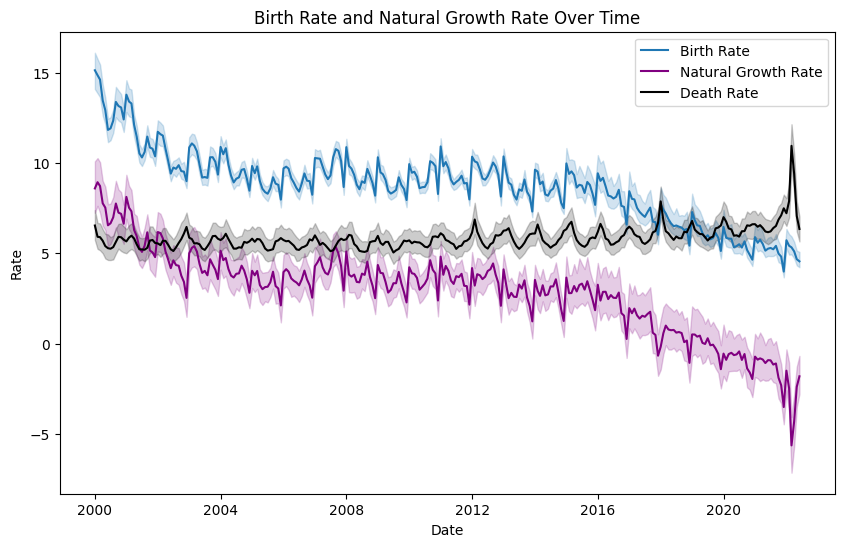

In [26]:
plt.figure(figsize=(10, 6))

df['Date'] = pd.to_datetime(df['Date'])

sns.lineplot(x='Date', y='Birth_rate', data=df, label='Birth Rate')

sns.lineplot(x='Date', y='Natural_growth_rate', data=df, color='purple', label='Natural Growth Rate')

sns.lineplot(x='Date', y='Death_rate', data=df, color='black', label='Death Rate')

plt.title('Birth Rate and Natural Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

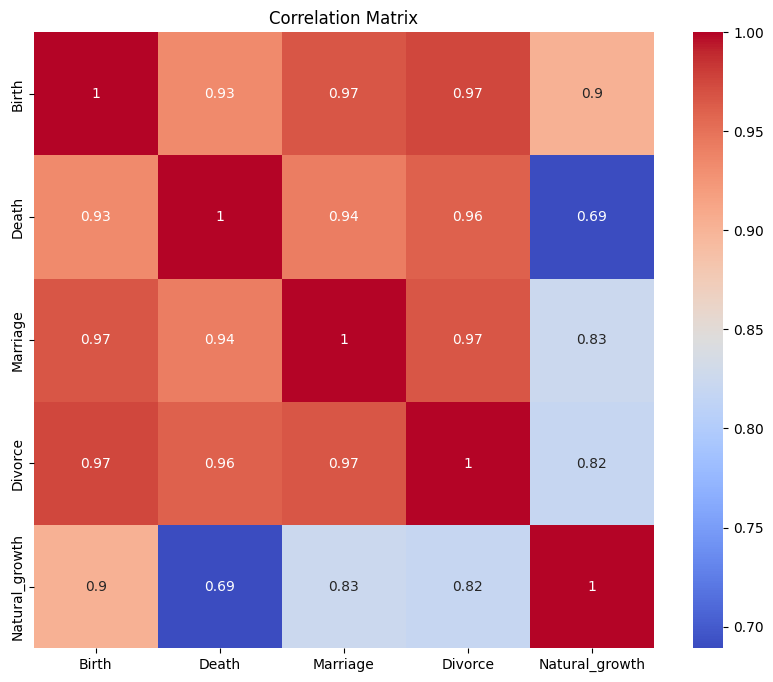

In [40]:
#Analyzing the correlation between key metrics
correlation_matrix = df[['Birth', 'Death', 'Marriage', 'Divorce', 'Natural_growth']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

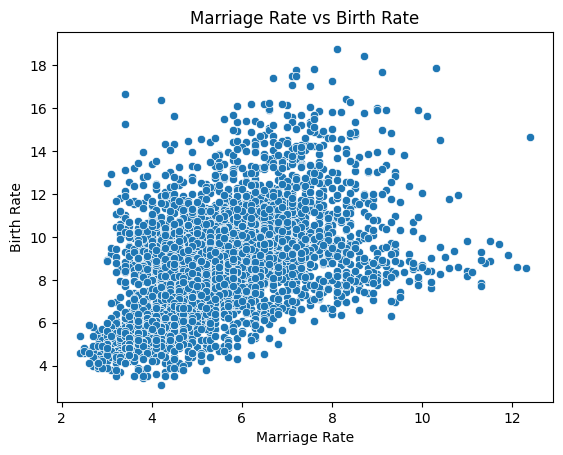

In [27]:
sns.scatterplot(x='Marriage_rate', y='Birth_rate', data=df)

plt.title('Marriage Rate vs Birth Rate')
plt.xlabel('Marriage Rate')
plt.ylabel('Birth Rate')

plt.show()

## Hypothesis

Hypothesis: There is a positive correlation between marriage rates and divorce rates.

Let's calculate the correlation coefficient between marriage and divorce rates

In [48]:
correlation = df['Marriage_rate'].corr(df['Divorce_rate'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.23625769709758127


Let's divide the data by region and evaluate the correlation for each of them. This will help to understand whether the connection exists in all regions or only in some.

In [53]:
regional_correlation = df.groupby('Region')['Marriage_rate'].corr(df['Divorce_rate'])
print(regional_correlation)

Region
Busan                0.278687
Chungcheongbuk-do    0.172021
Chungcheongnam-do    0.032489
Daegu                0.280665
Daejeon              0.270064
Gangwon-do           0.286809
Gwangju              0.235735
Gyeonggi-do          0.450436
Gyeongsangbuk-do     0.057964
Gyeongsangnam-do     0.165417
Incheon              0.297593
Jeju                 0.214480
Jeollabuk-do         0.164773
Jeollanam-do         0.050511
Sejong              -0.197155
Seoul                0.470390
Ulsan                0.074848
Whole country        0.352172
Name: Marriage_rate, dtype: float64


Let's build a scatter plot. If the points on the graph form an upward line, this may be a sign of a positive correlation.

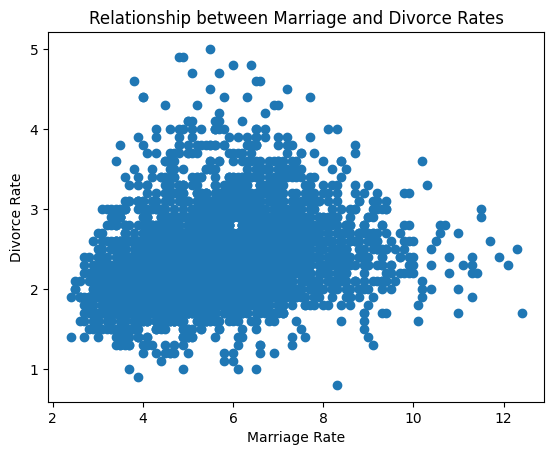

In [49]:
plt.scatter(df['Marriage_rate'], df['Divorce_rate'])
plt.title('Relationship between Marriage and Divorce Rates')
plt.xlabel('Marriage Rate')
plt.ylabel('Divorce Rate')
plt.show()


Result: hypothesis confirmed